In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data\\creditcard.csv")


In [5]:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight="balanced")
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



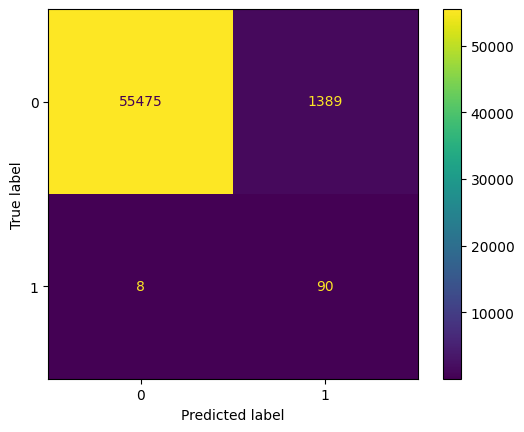

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


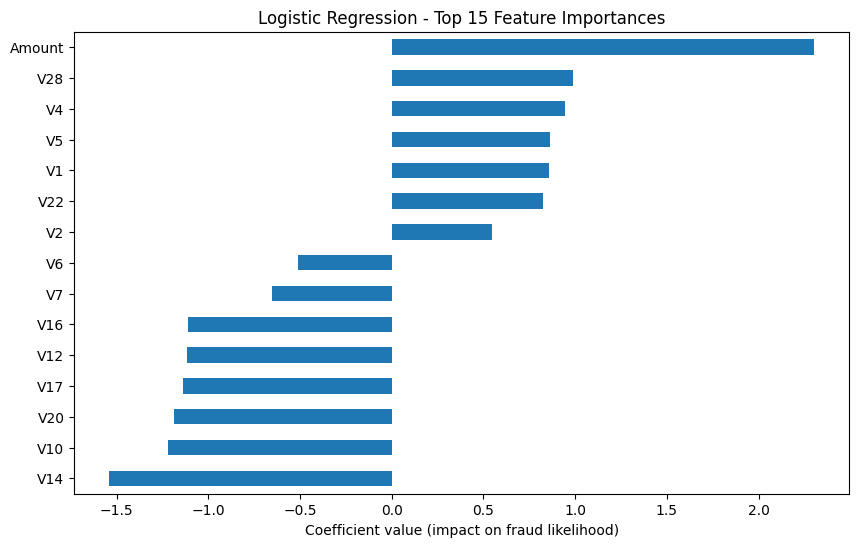

In [8]:
import matplotlib.pyplot as plt

coefs = pd.Series(lr.coef_[0], index=X.columns)

top_features = coefs.abs().sort_values(ascending=False).head(15).index
top_coefs = coefs[top_features]

plt.figure(figsize=(10,6))
top_coefs.sort_values().plot(kind='barh')
plt.title("Logistic Regression - Top 15 Feature Importances")
plt.xlabel("Coefficient value (impact on fraud likelihood)")
plt.show()


In [10]:
import joblib

joblib.dump(lr, "model\\final_logreg_model.pkl")
joblib.dump(scaler, "model\\scaler.pkl")

['model\\scaler.pkl']